<a href="https://colab.research.google.com/github/rmattoali/Text-retrieval-system/blob/main/Text_retrieval_system_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Richard Mattoali

In [1]:
# Import Libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Mount Gdrive
drive.mount('/content/drive')

# Load the CSV files
train = pd.read_csv('/content/drive/MyDrive/Text_retrieval_system_movies/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Text_retrieval_system_movies/test.csv')


# Drop empty descriptions on Train and Test. Ensure NA cells in the csv are not included.
train = train.dropna(subset=['description'])
test = test.dropna(subset=['description'])

print("Train entries loaded:", len(train))  # Should be 6129
print("Test entries loaded:", len(test))  # Should be 10


Mounted at /content/drive
Train entries loaded: 6129
Test entries loaded: 10


In [3]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Text_retrieval_system_movies/train.csv', encoding="ISO-8859-1")
# Expanding the display of description
pd.set_option('display.max_colwidth', None)
# Display title and decription as headers
data= data [['title','description']]
data.head()

,title,description
0,Tsotsi,"A South African hoodlum named Tsotsi (Presley Chweneyagae) lives by a code of violence, and he and his gang of thugs prowl the streets of Johannesburg day and night, attacking those who fail to give them what they want. After casually shooting a woman and stealing her car, he discovers her baby in the back seat. Instead of harming the mewling infant, he takes it home and cares for it. The child acts as a catalyst for the hardened thug to regain his humanity."
1,Abducted in Plain Sight,In 1974 a 12-year-old girl is abducted from a small church-going community in Idaho.
2,My Life Is Murder,"Private investigator Alexa Crow always fights the good fight, whether it be a baffling crime or just in her everyday life."
3,Empire,"Hip-hop artist and CEO of Empire Entertainment, Lucious Lyon, has always ruled unchallenged, but a medical diagnosis predicts he will be incapacitated in three years, which prompts the sharks to circle. Without further damaging his family, he must decide which of his three sons will take over. His favorite, young Hakeem, is a gifted musician but values fame over hard work. Middle son, Jamal, is talented and shy but gay -- embarrassing to Lyon. The oldest, Andre, is business-minded but lacks charisma. The reappearance of Cookie, his ex-wife, complicates things; she says he owes her for taking the fall for the drug-running that financed his early career."
4,Latter Days,"Aaron Davis (Steve Sandvoss), a young Mormon, arrives in Los Angeles with three fellow missionaries to evangelize. The group's promiscuous gay neighbor, Christian (Wes Ramsey), makes a bet he can seduce and sleep with one of them, and his flirtatious ways help Aaron realize he is actually gay. Returning home to small-town Idaho in shame, Aaron is sent to a faith-based center to be cured of his homosexuality -- while Christian, who's fallen in love with him, desperately tries to find him."


In [5]:
# Preprocess function
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text) # Remove punctuation using regex
    tokens = text.split() # Tokenise text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Remove stopwords and lemmatise each word
    return " ".join(tokens) # Return cleaned string

In [6]:
# Apply preprocessing
train['clean_desc'] = train['description'].astype(str).apply(preprocess_text)
test['clean_desc'] = test['description'].astype(str).apply(preprocess_text)

In [7]:
# Show cleaned description (after preprocess)
train

,title,description,clean_desc
0,Tsotsi,"A South African hoodlum named Tsotsi (Presley Chweneyagae) lives by a code of violence, and he and his gang of thugs prowl the streets of Johannesburg day and night, attacking those who fail to give them what they want. After casually shooting a woman and stealing her car, he discovers her baby in the back seat. Instead of harming the mewling infant, he takes it home and cares for it. The child acts as a catalyst for the hardened thug to regain his humanity.",south african hoodlum named tsotsi presley chweneyagae life code violence gang thug prowl street johannesburg day night attacking fail give want casually shooting woman stealing car discovers baby back seat instead harming mewling infant take home care child act catalyst hardened thug regain humanity
1,Abducted in Plain Sight,In 1974 a 12-year-old girl is abducted from a small church-going community in Idaho.,1974 12 year old girl abducted small church going community idaho
2,My Life Is Murder,"Private investigator Alexa Crow always fights the good fight, whether it be a baffling crime or just in her everyday life.",private investigator alexa crow always fight good fight whether baffling crime everyday life
3,Empire,"Hip-hop artist and CEO of Empire Entertainment, Lucious Lyon, has always ruled unchallenged, but a medical diagnosis predicts he will be incapacitated in three years, which prompts the sharks to circle. Without further damaging his family, he must decide which of his three sons will take over. His favorite, young Hakeem, is a gifted musician but values fame over hard work. Middle son, Jamal, is talented and shy but gay -- embarrassing to Lyon. The oldest, Andre, is business-minded but lacks charisma. The reappearance of Cookie, his ex-wife, complicates things; she says he owes her for taking the fall for the drug-running that financed his early career.",hip hop artist ceo empire entertainment lucious lyon always ruled unchallenged medical diagnosis predicts incapacitated three year prompt shark circle without damaging family must decide three son take favorite young hakeem gifted musician value fame hard work middle son jamal talented shy gay embarrassing lyon oldest andre business minded lack charisma reappearance cookie ex wife complicates thing say owes taking fall drug running financed early career
4,Latter Days,"Aaron Davis (Steve Sandvoss), a young Mormon, arrives in Los Angeles with three fellow missionaries to evangelize. The group's promiscuous gay neighbor, Christian (Wes Ramsey), makes a bet he can seduce and sleep with one of them, and his flirtatious ways help Aaron realize he is actually gay. Returning home to small-town Idaho in shame, Aaron is sent to a faith-based center to be cured of his homosexuality -- while Christian, who's fallen in love with him, desperately tries to find him.",aaron davis steve sandvoss young mormon arrives los angeles three fellow missionary evangelize group promiscuous gay neighbor christian wes ramsey make bet seduce sleep one flirtatious way help aaron realize actually gay returning home small town idaho shame aaron sent faith based center cured homosexuality christian fallen love desperately try find
...,...,...,...
6124,Team America: World Police,"When North Korean ruler Kim Jong-il (Trey Parker) orchestrates a global terrorist plot, it's up to the heavily armed marionettes of the highly specialized Team America unit to stop his dastardly scheme. The group, which includes the thespian-averse technology expert Chris (Matt Stone), not only has to face off against Jong-il, but they must also contend with F.A.G., the Film Actors Guild, a cadre of Hollywood liberals at odds with Team America's ""policing the world"" tactics.",north korean ruler kim jong il trey parker orchestrates global terrorist plot heavily armed marionette highly specialized team america unit stop dastardly scheme group includes thespian averse technology expert chris matt stone face jong il must also conte

In [8]:
# Build Inverted Index & IDF
def build_inverted_index(docs):
    index = {} # Which word appears in which movie and how many times
    df = {} # How many different movies each word appears in
    for i, doc in enumerate(docs):
        seen = set()
        for word in doc.split():
            if word not in index:
                index[word] = {}
            if i not in index[word]:
                index[word][i] = 0
            index[word][i] += 1 # term frequency (TF)
            if word not in seen:
                df[word] = df.get(word, 0) + 1 # document frequency (DF)
                seen.add(word)
    return index, df

# Build index from training data
inverted_index, doc_freqs = build_inverted_index(train['clean_desc'])
N = len(train)


# Compute IDF (Inverse Document Frequency)
def compute_idf(df, N):
    return {term: math.log(N / df[term]) for term in df} # IDF = log(N / df)

idf = compute_idf(doc_freqs, N)

In [9]:
# Compute Document Norms for Cosine Similarity
def compute_doc_norms(index, idf, N):
    norms = [0.0] * N # stores L2 norm for each document vector
    for term, postings in index.items():
        idf_t = idf[term]
        for doc_id, tf in postings.items():
            norms[doc_id] += (tf * idf_t) ** 2
    return [math.sqrt(n) for n in norms]

doc_norms = compute_doc_norms(inverted_index, idf, N)

In [10]:
# Retrieve Top-3
def get_top3_matches(query, inverted_index, idf, doc_norms):
    # Compute query term frequencies
    q_tf = {}
    for term in query.split():
        if term in idf:
            q_tf[term] = q_tf.get(term, 0) + 1
    # Compute query TF-IDF weights
    q_wts = {t: tf * idf[t] for t, tf in q_tf.items()}
    # Compute L2 norm of the query vector
    q_norm = math.sqrt(sum(w * w for w in q_wts.values()))

    # Score each document using dot product (cosine numerator)
    scores = [0.0] * N
    for term, wq in q_wts.items():
        for doc_id, tf in inverted_index[term].items():
            wd = tf * idf[term]
            scores[doc_id] += wq * wd
    # Normalise with document and query norms (cosine denominator)
    for i in range(N):
        if doc_norms[i] and q_norm:
            scores[i] /= (doc_norms[i] * q_norm)
    # Get top 3 highest score
    top3 = sorted(range(N), key=lambda i: scores[i], reverse=True)[:3]
    return top3, scores


Top 3 matches for: "Splitting Up Together"
Query description: Ellen DeGeneres serves as executive producer of this comedy that is based on a Danish series of the same name. Lena and Martin were certain enough that their marriage was over to make it official and go through the complicated untangling involved in filing for divorce. The last thing that they expected was to be brought back together by the experience, but they find their relationship strangely reignited by the experience. Together, they navigate their evolving relationship with open minds and newly reopened hearts.

1. Insomnia   (score = 0.1265)
2. Colin from Accounts   (score = 0.1262)
3. Happily Divorced   (score = 0.1152)


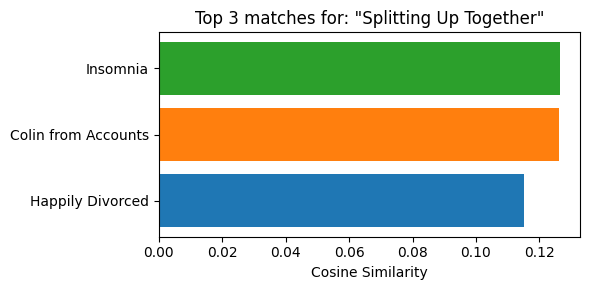


Top 3 matches for: "The Trip"
Query description: A collage of film images and ambient dance sounds from Jacques Peretti and DJ Downfall.

1. Mesrine: Killer Instinct   (score = 0.2004)
2. The Ellen DeGeneres Show   (score = 0.1511)
3. Oceans   (score = 0.1416)


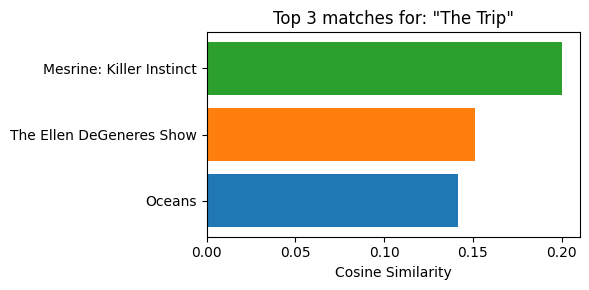


Top 3 matches for: "The Kids Are Alright"
Query description: Set in the 1970s, this ensemble comedy follows a traditional Irish-Catholic family, the Clearys, as it navigates big and small changes during one of America's most turbulent decades. In a working-class neighborhood outside Los Angeles, Mike and Peggy raise eight boisterous boys who live out their days with little supervision in their three bedroom, one bathroom home. The household is turned upside down when oldest son Lawrence returns home and announces he's quitting the seminary to go off and "save the world."

1. The Guest   (score = 0.1457)
2. The Great Indian Kitchen   (score = 0.1292)
3. Bob Biswas   (score = 0.1286)


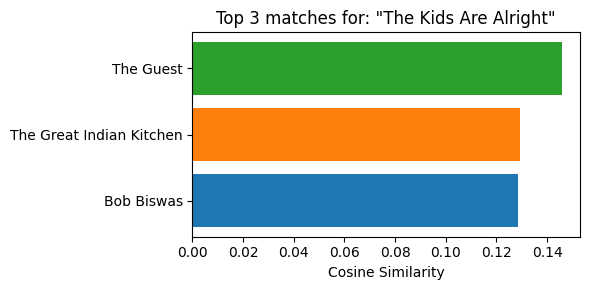


Top 3 matches for: "Breeders"
Query description: "Breeders" explores the paradox experienced by nearly all parents, the willingness to die for one's children coupled with the near-constant desire to kill them. Paul is a caring father who discovers he's not quite the man he thought he was. His partner, Ally, runs a recording studio, makes Paul laugh and has the ability to read a story to their children while she's technically asleep. In this honest and uncompromising comedy, Paul and Ally are juggling full-time careers, aging parents, a mortgage, upheavals in their relationship and the unenviable curveballs of parenting their young children, Luke and Ava. When Ally's estranged father Michael appears on their doorstep, the family essentially takes on a third child three quarters of the time, but this one comes with baggage and opinions. Paul's own parents, Jackie and Jim, are on hand to help out, but their generation does parenting a little differently.

1. #BlackAF   (score = 0.1979)
2

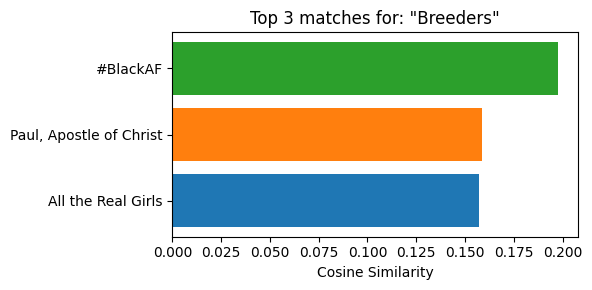


Top 3 matches for: "Let the Right One In"
Query description: The lives of Mark and his daughter, Eleanor, were forever changed 10 years earlier when she was turned into a vampire. As Eleanor is only able to go out at night, Mark does his best to provide her with the human blood she needs to stay alive.

1. The Good Place   (score = 0.2675)
2. Black Sails   (score = 0.1400)
3. The Silence   (score = 0.1374)


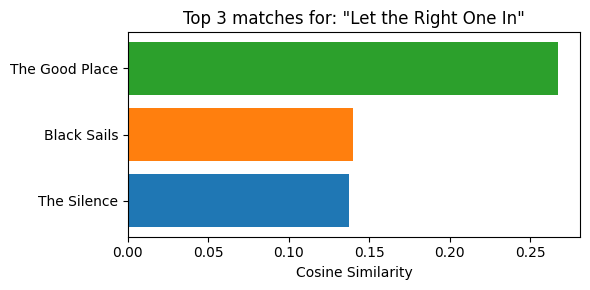


Top 3 matches for: "Raja Rani"
Query description: On the run from police, a thief (Rajesh Khanna) crashes a wedding and winds up marrying the bride (Sharmila Tagore).

1. Hulchul   (score = 0.2175)
2. Kill Bill: Vol. 1   (score = 0.1882)
3. Jawani Phir Nahi Ani   (score = 0.1745)


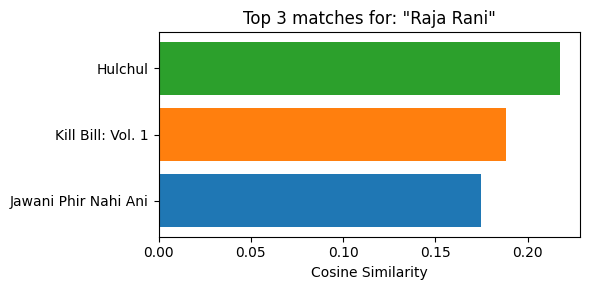


Top 3 matches for: "Bommarillu"
Query description: Siddhu's overprotective father decides to get him married to a rich girl. Siddhu's life, however, takes an interesting turn when he meets and falls in love with Hasini.

1. Socha Na Tha   (score = 0.2599)
2. Thammudu   (score = 0.2374)
3. In the Aisles   (score = 0.2201)


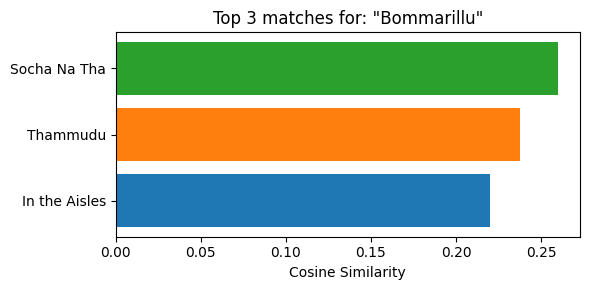


Top 3 matches for: "Father Brown"
Query description: Based on the novels of G.K. Chesterton.

1. K-19: The Widowmaker   (score = 0.1839)
2. The Man Who Knew Infinity   (score = 0.1543)
3. Durarara!!   (score = 0.1511)


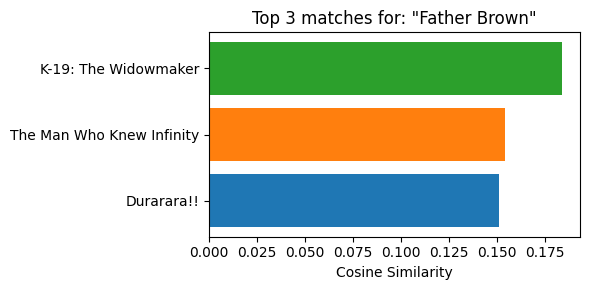


Top 3 matches for: "Jane the Virgin"
Query description: Jane Villanueva, the daughter of a teen mother, grew up determined not to repeat her mom's mistakes. Jane is studying to be a teacher, and she is engaged to a handsome detective who supports her decision to remain a virgin until marriage, but a routine visit to the clinic turns her life upside down. Inseminated by a specimen meant for a patient in the next room, Jane is in a situation made only more insane when she learns that the sperm donor is her boss, Rafael. As her meticulously planned life gets more like the telenovelas she loves, she faces a lot of complicated decisions about the future.

1. Jane by Design   (score = 0.2517)
2. Starbuck   (score = 0.1428)
3. Blindspot   (score = 0.1427)


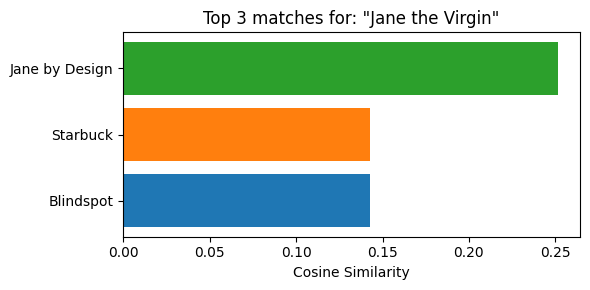


Top 3 matches for: "Morvern Callar"
Query description: When her boyfriend commits suicide, unambitious Glasgow clerk Morvern Callar (Samantha Morton) invents various stories to explain his absence. After several days, she chops up and buries the body. She then finds a novel he completed before killing himself and sends it to several publishing houses as her own work. When the book is bought, Morvern uses her first payment to take a Spanish vacation with her best friend, Lana (Kathleen McDermott), which turns out to be a surprising emotional journey.

1. Miss Violence   (score = 0.1355)
2. Christmas Getaway   (score = 0.1249)
3. Lip Service   (score = 0.1144)


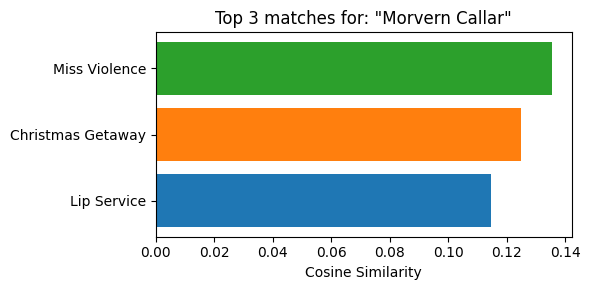

In [11]:
# Visualisation
for i in range(len(test)):
    # Extract title and descriptions
    title = test.at[i, 'title']
    raw_query = test.at[i, 'description']
    clean_query = test.at[i, 'clean_desc']

    # Find top 3 matches
    top3, scores = get_top3_matches(clean_query, inverted_index, idf, doc_norms)

    # Print result
    print(f"\nTop 3 matches for: \"{title}\"")
    print(f"Query description: {raw_query}\n")
    for rank, idx in enumerate(top3, 1):
        print(f"{rank}. {train.at[idx, 'title']}   (score = {scores[idx]:.4f})")

    # Bar plot visulisation
    titles_plot = [train.at[d, 'title'] for d in top3][::-1]
    sims_plot = [scores[d] for d in top3][::-1]
    plt.figure(figsize=(6, 3))

    colors = plt.colormaps.get_cmap('tab10').colors # Get colours from 'tab10' palette
    plt.barh(titles_plot, sims_plot, color=[colors[0], colors[1], colors[2]]) # Assign different colours to each bar
    plt.xlabel("Cosine Similarity")
    plt.title(f"Top 3 matches for: \"{title}\"")
    plt.tight_layout()
    plt.show()